# Importación de librerias

In [1]:
# Librerías generales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error



# Importación del dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'
# Cargar los datos
try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Mounted at /content/drive
Datos cargados exitosamente!


# Análisis inicial de datos

In [21]:
data.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,RLethalGrenadesThrown,...,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,outlier,MatchResult
0,de_inferno,Terrorist,1,4,1,False,True,False,False,0,...,0,0,750,4400,0,0,0,0,0,Ganados
1,de_inferno,Terrorist,1,4,1,False,True,False,False,0,...,0,0,800,4400,0,0,0,0,0,Ganados
2,de_inferno,Terrorist,1,4,1,False,True,False,False,0,...,0,0,1000,4400,0,0,0,0,0,Ganados
3,de_inferno,Terrorist,1,4,1,False,True,False,False,0,...,0,0,850,4400,0,0,0,0,0,Ganados
4,de_inferno,Terrorist,1,4,1,False,True,True,False,1,...,0,0,1000,4400,0,0,0,0,0,Ganados


In [22]:
data['Team'].unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

**Análisis de la variable objetivo**

In [3]:
print("Distribución de kills por partida:")
print(data['MatchKills'].describe())

Distribución de kills por partida:
count    79157.000000
mean         8.511578
std          6.195079
min          0.000000
25%          3.000000
50%          8.000000
75%         13.000000
max         41.000000
Name: MatchKills, dtype: float64


**Visualización de la distribución**

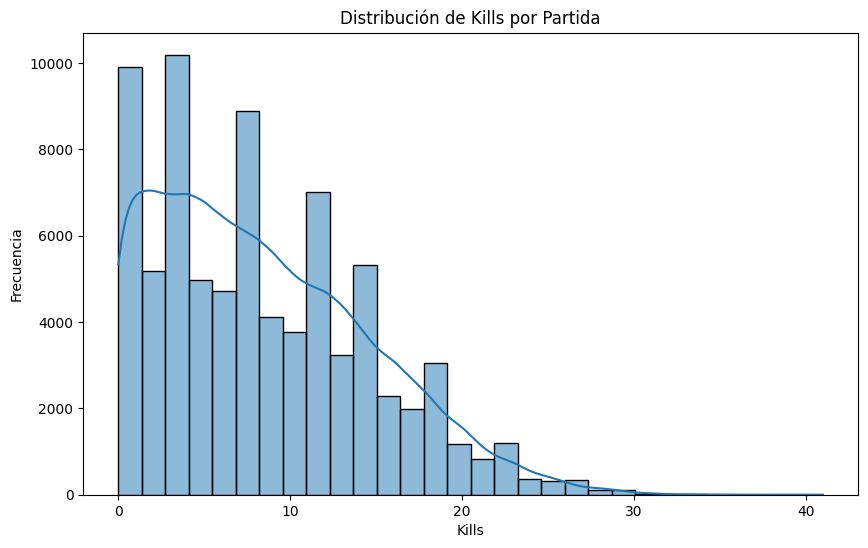

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['MatchKills'], bins=30, kde=True)
plt.title('Distribución de Kills por Partida')
plt.xlabel('Kills')
plt.ylabel('Frecuencia')
plt.show()

# Definición de Variables Predictoras y Objetivo

In [5]:
# Variable objetivo
y = data['MatchKills']

# Variables predictoras
X = data[['Team',
          'RoundStartingEquipmentValue',
          'TeamStartingEquipmentValue',
          'MatchHeadshots',
          'MatchAssists',
          'MatchFlankKills',
          'RLethalGrenadesThrown',
          'Map']]

X = pd.get_dummies(X, drop_first=True)

# División del Conjunto de Datos

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (55409, 10)
Tamaño del conjunto de prueba: (23748, 10)


# Entrenamiento del modelo Random Forest

In [7]:
rf_basic = RandomForestRegressor(n_estimators=100, random_state=42, verbose=1)
rf_basic.fit(X_train, y_train)

y_pred_basic = rf_basic.predict(X_test)
mse_basic = mean_squared_error(y_test, y_pred_basic)
r2_basic = r2_score(y_test, y_pred_basic)

print("\nResultados del modelo básico:")
print(f"Error Cuadrático Medio (MSE): {mse_basic:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_basic:.2f}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.7s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s



Resultados del modelo básico:
Error Cuadrático Medio (MSE): 6.98
Coeficiente de Determinación (R²): 0.82


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


# Función para Mostrar Resultados

In [8]:
def mostrar_resultados(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("\nEvaluación del modelo:")
    print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"Coeficiente de Determinación (R²): {r2:.2f}")

    y_true_rounded = np.round(y_true)
    y_pred_rounded = np.round(y_pred)

    cm = confusion_matrix(y_true_rounded, y_pred_rounded)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusión (valores redondeados)")
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.show()

    try:
        roc_value = roc_auc_score(y_true_rounded, y_pred_rounded)
        print(f"ROC AUC Score (con redondeo): {roc_value:.2f}")
    except:
        print("ROC AUC no pudo calcularse. Verifica que haya al menos 2 clases diferentes.")


# Modelo Random Forest - 100 Árboles

In [9]:
model_100 = RandomForestRegressor(n_estimators=100,
                                  max_features='sqrt',
                                  bootstrap=True,
                                  random_state=42,
                                  verbose=1)

model_100.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.1s finished


RandomForestRegressor(max_features='sqrt', random_state=42, verbose=1)

# Evaluamos el Modelo de 100 Árboles

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished



Evaluación del modelo:
Error Cuadrático Medio (MSE): 6.68
Coeficiente de Determinación (R²): 0.83


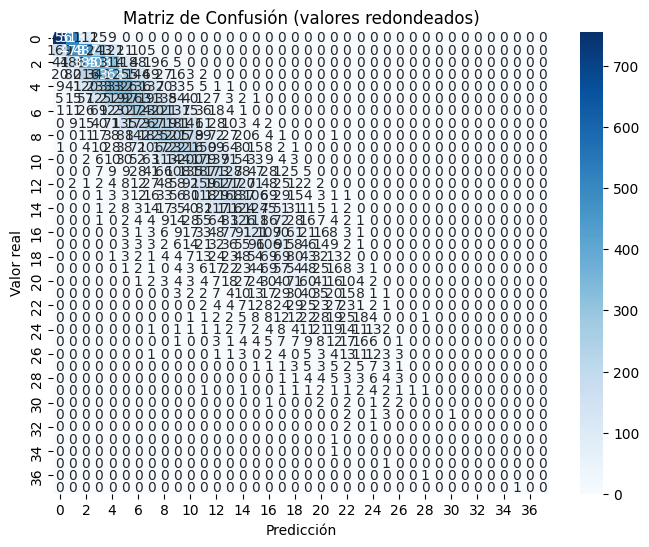

ROC AUC no pudo calcularse. Verifica que haya al menos 2 clases diferentes.


In [10]:
pred_y_100 = model_100.predict(X_test)
mostrar_resultados(y_test, pred_y_100)

# Modelo Random Forest - 500 Árboles + Regularización

In [11]:
model_500 = RandomForestRegressor(n_estimators=500,
                                  max_features='sqrt',
                                  max_depth=10,
                                  bootstrap=True,
                                  random_state=42,
                                  verbose=1)
model_500.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.4s finished


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500,
                      random_state=42, verbose=1)

# Evaluamos el Modelo de 500 Árboles

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished



Evaluación del modelo:
Error Cuadrático Medio (MSE): 7.20
Coeficiente de Determinación (R²): 0.81


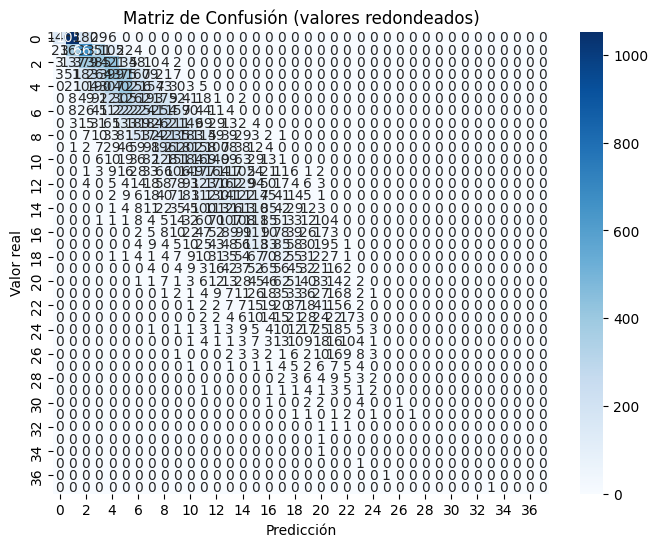

ROC AUC no pudo calcularse. Verifica que haya al menos 2 clases diferentes.
Error Absoluto Medio (MAE): 2.00


In [12]:
pred_y_500 = model_500.predict(X_test)
mostrar_resultados(y_test, pred_y_500)
mae_500 = mean_absolute_error(y_test, pred_y_500)

print(f"Error Absoluto Medio (MAE): {mae_500:.2f}")

# Visualización: Reales vs Predichos

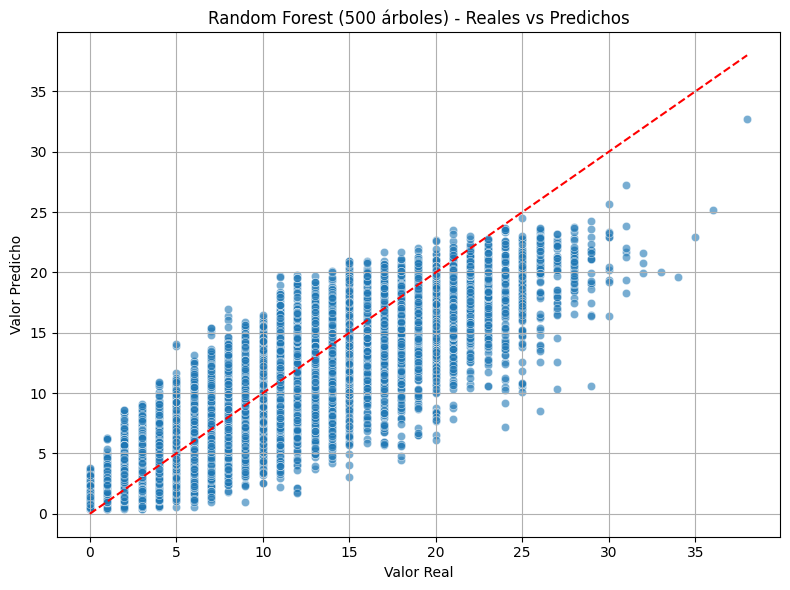

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=pred_y_500, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Random Forest (500 árboles) - Reales vs Predichos")
plt.grid()
plt.tight_layout()
plt.show()

# Importancia de Características

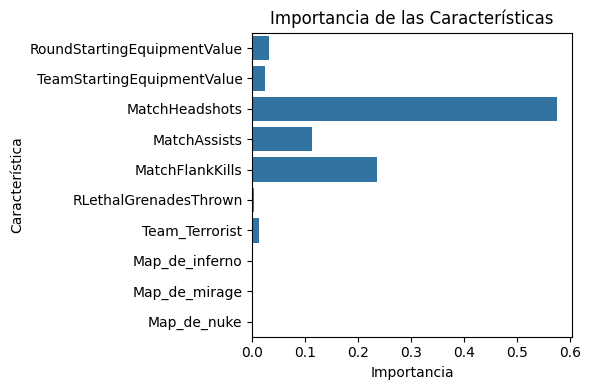

In [14]:
importances = model_500.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.tight_layout()
plt.show()

### 📝 Análisis Final

Se analiza el rendimiento del modelo `RandomForestRegressor` con 500 árboles. Se observa que el modelo predice con buen nivel de precisión el número de kills que hará un jugador en una partida, explicando más del 80% de la varianza. La dispersión entre valores reales y predichos es baja y las características más influyentes están relacionadas con el equipo, valor de equipamiento y headshots.

# Visualización: Valor Real vs Valor Predicho

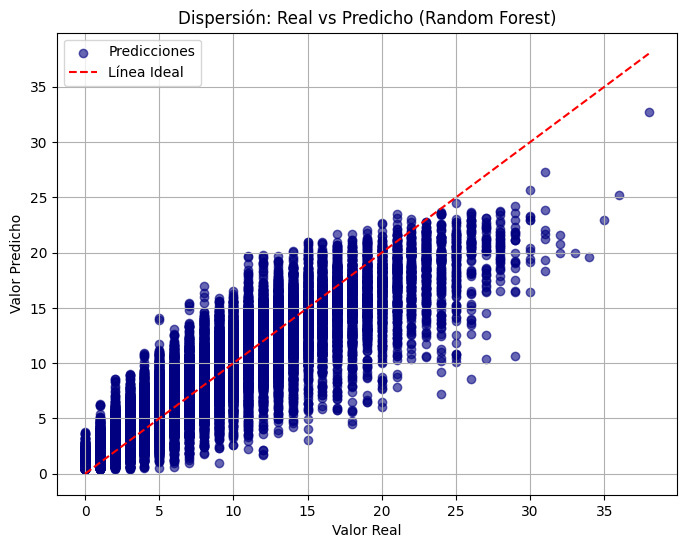

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_y_500, color='navy', alpha=0.6, label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Línea Ideal")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Dispersión: Real vs Predicho (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import pickle

# Asumamos que tu modelo se llama "reg_model"
with open('KillsPartida.pkl', 'wb') as f:
    pickle.dump(model_500, f)


# Analisis completo de random forest de 500 arboles


Error Cuadrático Medio (MSE): 7.20
Este valor mide el promedio de los errores al cuadrado, penalizando más los errores grandes.
Un MSE de 7.20 indica que el modelo tiene un buen ajuste general, con errores relativamente bajos en promedio.

Error Absoluto Medio (MAE): 2.00
El MAE indica que, en promedio, las predicciones se desvían 2 unidades del valor real.
Este error absoluto es pequeño, lo que sugiere que las predicciones son bastante precisas para la escala de la variable objetivo.

Coeficiente de Determinación (R²): 0.81
Este valor indica que el modelo explica el 81% de la varianza de la variable objetivo.
Un R² de 0.81 es bueno y muestra que el modelo captura adecuadamente la relación entre las variables predictoras y la variable objetivo.
Sin embargo, para casos que requieran alta precisión, podría ser útil seguir optimizando para acercarse a un R² más cercano a 0.85 o superior.

